# Final Project Report

* Class: DS 5100
* Student Name: Shriya Kuruba
* Student Net ID: ewu9af
* This URL: https://github.com/shriyakuruba/PROJECT/blob/main/DS51200_FinalProjectTemplate.ipynb

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/shriyakuruba/PROJECT

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

```python
import pandas as pd
import numpy as np

class Die:
    """A class representing a single die with N sides and W weights.

    Each face has a unique symbol, and a weight associated with it that determines the likelihood of that face being rolled. By default, all weights are 1.0, making the die fair, but can be changed after the object is created. The die can be rolled to select a face based on weights.

    Attributes:
        faces (np.ndarray): A NumPy array of unique face symbols.
        weights (np.ndarray): A NumPy array of weights, defaulting to 1.0 for each face.
        _df (pd.DataFrame): A private DataFrame storing faces and weights with faces as the index.
    """
    def __init__(self, faces: np.ndarray):
        """Initializes the Die object with the provided faces.

        Args:
            faces (np.ndarray): A NumPy array of unique face symbols (must be strings or numbers).

        Raises:
            TypeError: If `faces` is not a NumPy array.
            ValueError: If the values in `faces` are not distinct.
        """
        # to take care of the errors for this method
        if not isinstance(faces, np.ndarray):
            raise TypeError("Faces must be a NumPy array.")
        if len(np.unique(faces)) != len(faces):
            raise ValueError("Faces must be unique.")
            
        self.faces  = faces    
        self._df = pd.DataFrame({'face': faces, 'weight': [1.0] * len(faces)})
        self._df.set_index('face', inplace=True)

    def change_weight(self, face, new_weight):
        """Changes the weight of a single face on the die.

        Args:
            face (str or int): The face value whose weight should be changed.
            new_weight (float): The new weight to assign to the face chosen.

        Raises:
            IndexError: If the face is not found in the die.
            TypeError: If the weight is not numeric or cannot be cast as numeric.
        """
        if face not in self._df.index:
            raise IndexError(f"Face '{face}' is not in the die.")
        try:
            new_weight = float(new_weight)
        except (TypeError, ValueError):
            raise TypeError("New weight must be a numeric value (int or float).")
            
        self._df.loc[face, 'weight'] = new_weight

    def roll(self, num_rolls = 1):
        """Rolls the die one or more times using the current weights.

        Args:
            num_rolls (int): Number of rolls to perform. Defaults to 1.

        Returns:
            list: A list of outcomes from the rolls.
        
        Raises:
            ValueError: If `num_rolls` is not a positive integer.
        """
        if not isinstance(num_rolls, int) or num_rolls < 1:
            raise ValueError("Number of rolls must be a positive integer.")
            
        results = list(
            np.random.choice(
                self._df.index,
                size = num_rolls,
                replace = True,
                p = self._df['weight'] / self._df['weight'].sum()
            )
        )
        return results
    
    def show_die(self):
        """Show the current faces and weights of the die.

        Returns:
            pd.DataFrame: A copy of the internal dataframe.
        """
        return  self._df.copy()
    
class Game:
    """
    A Game consists of rolling one or more Die objects a specified number of times.
    
    The game is played by rolling all provided dice a specified number of times.
    Dice in a game are considered similar if they have the same faces, although their weights may differ.
    The Game class only stores the results of the most recent play.

    Attributes:
        dice (list): A list of Die objects.
        _results (pd.DataFrame): Results of the most recent play.
    """
    def __init__(self, dice_list: list):
        """
        Initialize the Game with a list of Die objects.

        Args:
            dice_list (list): List of Die objects.
        
        Raises:
            TypeError: If any item in the list is not an instance of the Die class.
            ValueError: If not all dice have the same faces.
        """
        
        if not all(isinstance(d, Die) for d in dice_list):
            raise TypeError("All elements in dice must be instances of the Die class.")
        
        first_face = dice_list[0].faces
        for d in dice_list[1:]:
            if not np.array_equal(d.faces, first_face):
                raise ValueError("All dice must have the same set of faces.")
                
        self.dice = dice_list
        self._results = None

    def play(self, num_rolls: int):
        """
        Roll all dice for a specified number of times and store the result.

        Args:
            n_rolls (int): Number of times to roll the dice.
            
        Raises:
            ValueError: If `num_rolls` is not a positive integer.
        """
        
        if not isinstance(num_rolls, int) or num_rolls < 1:
            raise ValueError("Number of rolls must be a positive integer.")

        roll_data = {}
        for i, die in enumerate(self.dice):
            roll_data[i] = die.roll(num_rolls)

        self._results = pd.DataFrame(roll_data)
        self._results.index.name = "Roll Number"

    def show(self, form: str = "wide"):
        """
        Show the results of the most recent play.

        Args:
            form (str): Format of the returned DataFrame. Either 'wide' or 'narrow'.
                                  'wide' returns the DataFrame as-is (default).
                                  'narrow' returns a long-format version with three columns:
                                  Roll Number, Die Number, and Face.

        Returns:
            pd.DataFrame: A copy of the play results in the specified format.

        Raises:
            ValueError: If the `form` argument is not 'wide' or 'narrow'.
        """
        if self._results is None:
            return pd.DataFrame()  # No play has occurred yet

        if form == "wide":
            return self._results.copy()
        elif form == "narrow":
            return self._results.reset_index().melt(id_vars=["Roll Number"],
                                                         var_name="Die Number",
                                                         value_name="Face")
        else:
            raise ValueError("form must be either 'wide' or 'narrow'")
            
            
class Analyzer:
    """
    An Analyzer takes the results of a single Game and computes descriptive statistics

    Attributes:
        game (Game): A Game object containing the results of the dice rolls
        results (pd.DataFrame): The results of the game's last play (each row is a roll)
    """
    def __init__(self, game):
        """
        Initialize the Analyzer with a Game object.

        Parameters:
            game (Game): An instance of the Game object

        Raises:
            ValueError: If input is not an instance of Game
        """
        if not isinstance(game, Game):
            raise ValueError("The input must be a Game object.")
        
        self.game = game
        self.results = game.show('wide')
        
    def jackpot(self):
        """
        Count how many times all dice in a roll showed the same face

        Returns:
            int: # of jackpots
        """
        jackpots = self.results.nunique(axis = 1) == 1
        return jackpots.sum()

    def face_counts_per_roll(self):
        """
        Counts how many times each face appeared in each roll

        Returns:
            pd.DataFrame: A DataFrame with roll number as index, face values as columns, and the count of each face per roll as values
        """
        face_counts = self.results.apply(pd.Series.value_counts, axis = 1).fillna(0).astype(int)
        face_counts.index.name = "roll number"
        return face_counts

    def combo(self):
        """
        Counts the distinct combinations of faces rolled, along with their counts
        
        Combos are unordered ([1,2,3] is the same as [3,2,1]) and can include repeated faces

        Returns:
            pd.DataFrame: DataFrame indexed by combo with 'count' column.
        """
        sorted_results = self.results.apply(lambda row: tuple(sorted(row)), axis=1)
        combos = sorted_results.value_counts().sort_index()
        combo_df = combos.to_frame(name='count')
        combo_df.index = pd.MultiIndex.from_tuples(combo_df.index)
        return combo_df

    def permutation(self):
        """
        Counts the distinct permutations of faces rolled (order matters), along with count

        Returns:
            pd.DataFrame: DataFrame indexed by permutation with 'count' column.
        """
        perms = self.results.apply(lambda row: tuple(row), axis=1).value_counts().sort_index()
        perm_df = perm.to_frame(name='count')
        perm_df.index = pd.MultiIndex.from_tuples(perm_df.index)
        return perm_df
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```python
import unittest
import numpy as np
import pandas as pd

from montecarlo.montecarlo import Die, Game, Analyzer

class TestDie(unittest.TestCase):
    """
    Unit tests for the Die class.
    
    Tests:
        - Initialization and internal structure
        - Changing weight of a face
        - Handling invalid inputs
        - Rolling the die
        - Showing the faces and weights
    """

    def setUp(self):
        """Set up a standard 3-face die for testing."""
        self.faces = np.array([1, 2, 3])
        self.die = Die(self.faces)

    def test_init_(self):
        """
        Test that the Die object creates an internal DataFrame with proper structure.
        """
        self.assertIsInstance(self.die._df, pd.DataFrame)
        self.assertListEqual(sorted(self.die._df.columns.tolist()), ['weight'])

    def test_change_weight(self):
        """
        Test that change_weight correctly modifies the weight of a face.
        """
        self.die.change_weight(2, 5.0)
        self.assertEqual(self.die._df.loc[2, 'weight'], 5.0)
        
    def test_change_weight_invalid_face(self):
        """
        Test that change_weight raises IndexError for a non-existent face.
        """
        with self.assertRaises(IndexError):
            self.die.change_weight('invalid', 2.0)

    def test_roll(self):
        """
        Test that roll returns a NumPy array of the correct length.
        """
        result = self.die.roll(5)
        self.assertIsInstance(result, list)
        self.assertEqual(len(result), 5)

    def test_show_die(self):
        """
        Test that show returns a DataFrame with 'face' and 'weight' columns.
        """
        df = self.die.show_die()
        self.assertIsInstance(df, pd.DataFrame)
        self.assertListEqual(sorted(df.columns.tolist()), ['weight'])
        self.assertTrue(df.index.is_unique)


class TestGame(unittest.TestCase):
    """
    Unit tests for the Game class.

    Tests:
        - Playing a game and saving results
        - Showing results in wide and narrow format
    """

    def setUp(self):
        """Set up a simple 2-die game using coin faces."""
        faces = np.array(['H', 'T'])
        die1 = Die(faces)
        die2 = Die(faces)
        self.game = Game([die1, die2])

    def test_play(self):
        """
        Test that the play method creates a result DataFrame with correct shape.
        """
        self.game.play(10)
        df = self.game._results
        self.assertEqual(df.shape, (10, 2))  # 10 rolls, 2 dice

    def test_show_wide_format(self):
        """
        Test that show('wide') returns a wide-format DataFrame.
        """
        self.game.play(5)
        result = self.game.show('wide')
        self.assertIsInstance(result, pd.DataFrame)
        self.assertEqual(result.shape[1], 2)  # 2 dice columns

    def test_show_narrow_format(self):
        """
        Test that show('narrow') returns a long-format DataFrame with correct columns.
        """
        self.game.play(3)
        result = self.game.show('narrow')
        self.assertIsInstance(result, pd.DataFrame)
        self.assertEqual(set(result.columns), {'roll number', 'die number', 'face'})


class TestAnalyzer(unittest.TestCase):
    """
    Unit tests for the Analyzer class.

    Tests:
        - Jackpot detection
        - Face count per roll structure
        - Combo frequency generation
        - Permutation frequency generation
    """

    def setUp(self):
        """Set up a game and analyzer for testing statistical properties."""
        faces = np.array([1, 2, 3])
        dice = [Die(faces) for _ in range(3)]
        self.game = Game(dice)
        self.game.play(20)
        self.analyzer = Analyzer(self.game)

    def test_jackpot_output(self):
        """
        Test that jackpot returns an integer (count of matching rolls).
        """
        result = self.analyzer.jackpot()
        self.assertIsInstance(result, int)

    def test_face_counts_per_roll_structure(self):
        """
        Test that face_counts_per_roll returns a DataFrame with roll count rows.
        """
        df = self.analyzer.face_counts_per_roll()
        self.assertIsInstance(df, pd.DataFrame)
        self.assertEqual(df.shape[0], 20)

    def test_combo_returns_dataframe(self):
        """
        Test that combo returns a DataFrame with combinations and counts.
        """
        combo_df = self.analyzer.combo()
        self.assertIsInstance(combo_df, pd.DataFrame)
        self.assertIn('count', combo_df.columns)

    def test_permutation_returns_dataframe(self):
        """
        Test that permutation returns a DataFrame with permutations and counts.
        """
        perm_df = self.analyzer.permutation()
        self.assertIsInstance(perm_df, pd.DataFrame)
        self.assertIn('count', perm_df.columns)


if __name__ == '__main__':
    unittest.main()
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

```python
Ran 12 tests in 0.028s

OK
bash-4.4$python -m unittest -v test_montecarlo.py
test_combo_returns_dataframe (test_montecarlo.TestAnalyzer.test_combo_returns_dataframe)
Test that combo returns a DataFrame with combinations and counts. ... ok
test_face_counts_per_roll_structure (test_montecarlo.TestAnalyzer.test_face_counts_per_roll_structure)
Test that face_counts_per_roll returns a DataFrame with roll count rows. ... ok
test_jackpot_output (test_montecarlo.TestAnalyzer.test_jackpot_output)
Test that jackpot returns an integer (count of matching rolls). ... ok
test_permutation_returns_dataframe (test_montecarlo.TestAnalyzer.test_permutation_returns_dataframe)
Test that permutation returns a DataFrame with permutations and counts. ... ok
test_change_weight (test_montecarlo.TestDie.test_change_weight)
Test that change_weight correctly modifies the weight of a face. ... ok
test_change_weight_invalid_face (test_montecarlo.TestDie.test_change_weight_invalid_face)
Test that change_weight raises IndexError for a non-existent face. ... ok
test_init_ (test_montecarlo.TestDie.test_init_)
Test that the Die object creates an internal DataFrame with proper structure. ... ok
test_roll (test_montecarlo.TestDie.test_roll)
Test that roll returns a NumPy array of the correct length. ... ok
test_show_die (test_montecarlo.TestDie.test_show_die)
Test that show returns a DataFrame with 'face' and 'weight' columns. ... ok
test_play (test_montecarlo.TestGame.test_play)
Test that the play method creates a result DataFrame with correct shape. ... ok
test_show_narrow_format (test_montecarlo.TestGame.test_show_narrow_format)
Test that show('narrow') returns a long-format DataFrame with correct columns. ... ok
test_show_wide_format (test_montecarlo.TestGame.test_show_wide_format)
Test that show('wide') returns a wide-format DataFrame. ... ok

----------------------------------------------------------------------
Ran 12 tests in 0.028s

OK
```

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [6]:
import montecarlo.montecarlo as montecarlo

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [7]:
help(montecarlo)

Help on module montecarlo.montecarlo in montecarlo:

NAME
    montecarlo.montecarlo

CLASSES
    builtins.object
        Analyzer
        Die
        Game
    
    class Analyzer(builtins.object)
     |  Analyzer(game)
     |  
     |  An Analyzer takes the results of a single Game and computes descriptive statistics
     |  
     |  Attributes:
     |      game (Game): A Game object containing the results of the dice rolls
     |      results (pd.DataFrame): The results of the game's last play (each row is a roll)
     |  
     |  Methods defined here:
     |  
     |  __init__(self, game)
     |      Initialize the Analyzer with a Game object.
     |      
     |      Parameters:
     |          game (Game): An instance of the Game object
     |      
     |      Raises:
     |          ValueError: If input is not an instance of Game
     |  
     |  combo(self)
     |      Counts the distinct combinations of faces rolled, along with their counts
     |      
     |      Combos are u

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/shriyakuruba/PROJECT/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

```python
bash-4.4$pip install .
Defaulting to user installation because normal site-packages is not writeable
Processing /sfs/gpfs/tardis/home/ewu9af/PROJECT
  Preparing metadata (setup.py) ... done
Building wheels for collected packages: montecarlo
  Building wheel for montecarlo (setup.py) ... done
  Created wheel for montecarlo: filename=montecarlo-1-py3-none-any.whl size=5368 sha256=4fc4083dd24f6fd475351907206b4dd7a3fab174bd23d7e6481e80697dc2c6ee
  Stored in directory: /tmp/pip-ephem-wheel-cache-_ms1hlz3/wheels/38/b0/3d/750d7bd5b3be937cdafbd0b00bcc30055951da8f3983c581ea
Successfully built montecarlo
Installing collected packages: montecarlo
Successfully installed montecarlo-1
```

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [15]:
import numpy as np
from montecarlo import Die, Game, Analyzer

In [22]:
faces = np.array(['H', 'T'])
fair_coin = Die(faces)
print(fair_coin.show_die())

      weight
face        
H        1.0
T        1.0


In [23]:
unfair_coin = Die(faces)
unfair_coin.change_weight('H', 5)
print(unfair_coin.show_die())

      weight
face        
H        5.0
T        1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [26]:
die1 = fair_coin
die2 = fair_coin

game1 = Game([die1, die2])

game1.play(1000)
print(game1.show('wide'))

             0  1
roll number      
0            H  T
1            T  T
2            H  T
3            T  H
4            H  H
...         .. ..
995          H  T
996          T  H
997          T  T
998          H  H
999          T  T

[1000 rows x 2 columns]


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [25]:
game2 = Game([unfair_coin, unfair_coin, fair_coin])

game2.play(1000)
print(game2.show('wide'))

             0  1  2
roll number         
0            H  H  H
1            H  H  H
2            H  H  H
3            H  T  H
4            H  H  T
...         .. .. ..
995          T  T  T
996          H  H  T
997          T  H  H
998          H  H  H
999          H  H  T

[1000 rows x 3 columns]


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [37]:
analyzer1 = Analyzer(game1)
jackpot1 = analyzer1.jackpot()
print(f"Game 1: {jackpot1}")

Game 1: 500


In [38]:
analyzer2 = Analyzer(game2)
jackpot2 = analyzer2.jackpot()
print(f"Game 2: {jackpot2}")

Game 2: 359


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [39]:
total_rolls_game1 = analyzer1.results.shape[0]
total_rolls_game2 = analyzer2.results.shape[0]

relative_freq1 = jackpot1 / total_rolls_game1
relative_freq2 = jackpot2 / total_rolls_game2

print(f"Game 1: {relative_freq1:.4f}")
print(f"Game 2:{relative_freq2:.4f}")

Game 1: 0.5000
Game 2:0.3590


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

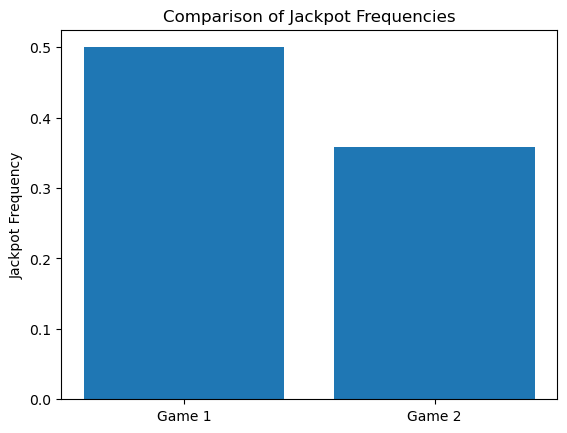

In [48]:
import matplotlib.pyplot as plt

labels = ['Game 1', 'Game 2']
frequencies = [relative_freq1, relative_freq2]

plt.bar(labels, frequencies)
plt.ylabel('Jackpot Frequency')
plt.title('Comparison of Jackpot Frequencies')

plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [65]:
faces6 = np.array([1, 2, 3, 4, 5, 6])

die1 = Die(faces6)
die2 = Die(faces6)
die3 = Die(faces6)

In [66]:
print(f"Die 1: {die1.show_die()}")

Die 1:       weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0


In [67]:
print(f"Die 2: {die2.show_die()}")

Die 2:       weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0


In [68]:
print(f"Die 3: {die3.show_die()}")

Die 3:       weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0


Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [69]:
die1.change_weight(6, 5)

print(f"New Die 1: {die1.show_die()}")

New Die 1:       weight
face        
1        1.0
2        1.0
3        1.0
4        1.0
5        1.0
6        5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [70]:
die3.change_weight(1, 5)

print(f"New Die 3: {die3.show_die()}")

New Die 3:       weight
face        
1        5.0
2        1.0
3        1.0
4        1.0
5        1.0
6        1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [74]:
fair_dice1 = Die(faces6)
fair_dice2 = Die(faces6)
fair_dice3 = Die(faces6)
fair_dice4 = Die(faces6)
fair_dice5 = Die(faces6)

game_fair = Game([fair_dice1, fair_dice2, fair_dice3, fair_dice4, fair_dice5])
game_fair.play(10000)

print(game_fair.show('wide'))

             0  1  2  3  4
roll number               
0            5  3  2  5  3
1            1  1  1  2  3
2            5  4  2  6  6
3            1  5  2  1  2
4            6  2  2  5  5
...         .. .. .. .. ..
9995         3  3  6  2  6
9996         1  4  6  1  3
9997         5  5  4  2  2
9998         1  4  5  5  4
9999         5  1  5  2  6

[10000 rows x 5 columns]


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [73]:
game_unfair = Game([die1, die3, fair_dice2, fair_dice4, fair_dice5])

game_unfair.play(10000)
print(game_unfair.show('wide'))

             0  1  2  3  4
roll number               
0            6  5  4  6  2
1            4  4  6  4  4
2            6  6  1  6  3
3            6  4  4  4  4
4            6  1  2  1  5
...         .. .. .. .. ..
9995         2  1  3  2  6
9996         2  3  5  5  5
9997         4  2  3  2  2
9998         2  4  6  4  4
9999         2  2  3  6  2

[10000 rows x 5 columns]


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

Fair Game: 16 (0.0016)
Unfair Game: 6 (0.0006)


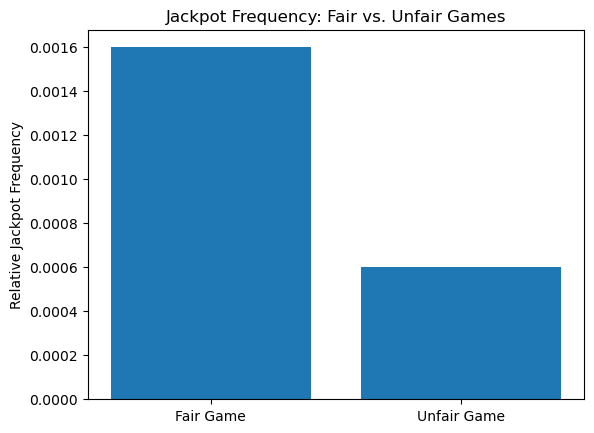

In [80]:
analyzer_fair = Analyzer(game_fair)
analyzer_unfair = Analyzer(game_unfair)

# Get jackpot counts
jackpot_fair = analyzer_fair.jackpot()
jackpot_unfair = analyzer_unfair.jackpot()

# Compute relative frequencies
relative_fair = jackpot_fair / analyzer_fair.results.shape[0]
relative_unfair = jackpot_unfair / analyzer_unfair.results.shape[0]

# Display raw counts and frequencies
print(f"Fair Game: {jackpot_fair} ({relative_fair})")
print(f"Unfair Game: {jackpot_unfair} ({relative_unfair})")

# Bar chart
plt.bar(['Fair Game', 'Unfair Game'], [relative_fair, relative_unfair])
plt.ylabel('Relative Jackpot Frequency')
plt.title('Jackpot Frequency: Fair vs. Unfair Games')
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).